<h2 align=center> Classify Radio Signals from Outer Space with Keras</h2>

In [1]:
cd D:\zzzzzzzzzzzzzzzzzzCoursera proj\Radio signals classifier

D:\zzzzzzzzzzzzzzzzzzCoursera proj\Radio signals classifier


![](Allen_Telescope.jpg)
[Allen Telescope Array](https://flickr.com/photos/93452909@N00/5656086917) by [brewbooks](https://www.flickr.com/people/93452909@N00) is licensed under [CC BY 2.0](https://creativecommons.org/licenses/by/2.0/)

## Task 1: Import Libraries

In [2]:
from livelossplot.tf_keras import PlotLossesCallback
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

from sklearn.metrics import confusion_matrix
from sklearn import metrics

import numpy as np
np.random.seed(42)
import warnings;warnings.simplefilter('ignore')
%matplotlib inline
print('Tensorflow version:', tf.__version__)

Tensorflow version: 2.1.0


## Task 2: Load and Preprocess SETI Data

In [3]:
train_images=pd.read_csv('dataset/train/images.csv',header =None)
train_labels=pd.read_csv('dataset/train/labels.csv',header =None)

val_images=pd.read_csv('dataset/validation/images.csv',header =None)
val_labels=pd.read_csv('dataset/validation/labels.csv',header =None)

In [4]:
train_images.head(3)

,0,1,2,3,4,5,6,7,8,9,...,8182,8183,8184,8185,8186,8187,8188,8189,8190,8191
0,0.631373,0.623529,0.713726,0.705882,0.658824,0.666667,0.654902,0.635294,0.647059,0.705882,...,0.682353,0.611765,0.650980,0.658824,0.600000,0.603922,0.654902,0.694118,0.658824,0.666667
1,0.725490,0.752941,0.749020,0.701961,0.690196,0.721569,0.709804,0.745098,0.654902,0.721569,...,0.721569,0.698039,0.721569,0.686275,0.713726,0.682353,0.690196,0.698039,0.701961,0.725490
2,0.717647,0.701961,0.713726,0.733333,0.705882,0.717647,0.725490,0.682353,0.717647,0.674510,...,0.709804,0.694118,0.705882,0.682353,0.639216,0.713726,0.670588,0.678431,0.737255,0.674510


In [5]:
train_labels.head(3)

,0,1,2,3
0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0


In [6]:
print("Training Set shape:",train_images.shape,train_labels.shape)
print("Validation Set shape:",val_images.shape,val_labels.shape)

Training Set shape: (3200, 8192) (3200, 4)
Validation Set shape: (800, 8192) (800, 4)


In [7]:
x_train = train_images.values.reshape(3200, 64, 128, 1)
x_val = val_images.values.reshape(800, 64, 128, 1)
y_train = train_labels.values
y_val = val_labels.values

## Task 3: Plot 2D Spectrograms

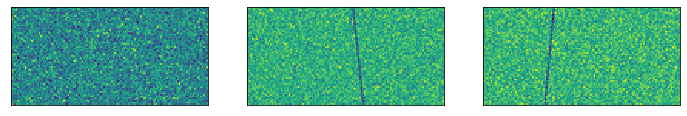

In [8]:
plt.figure(0, figsize=(12,12)) # for the size of the figure 
for i in range(1,4):
    plt.subplot(1,3,i) # with subplot it means we want 1 row and 3 cols 
    img = np.squeeze(x_train[np.random.randint(0, x_train.shape[0])]) # we select random integer 
    plt.xticks([]) # np. squeeze removes any additional axis 
    plt.yticks([])
    plt.imshow(img) # we can put colour map - cmap="gray" as argument to get a grey color
    #the line we see is the signal 

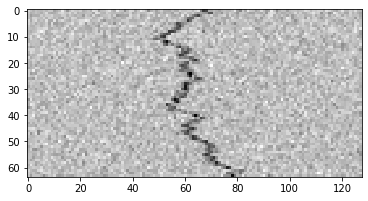

In [9]:
plt.imshow(np.squeeze(x_train[3]),cmap= 'gray')

## Task 4: Create Training and Validation Data Generators

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen_train = ImageDataGenerator(horizontal_flip=True) # we will flip the images 
datagen_train.fit(x_train)
datagen_val = ImageDataGenerator(horizontal_flip=True)
datagen_val.fit(x_val)

In [11]:
# CNN are able to break down complex multiple images to simple hierarchial data 
# there are many layers .. layer after layer the final data is outputted 

## Task 5: Creating the CNN Model

In [12]:
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
# the above are the layers we are using - Dense, Input...
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D

from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam, SGD # they are optimisers 
from tensorflow.keras.callbacks import ModelCheckpoint

In [13]:
# Initialising the CNN
#we initialise it as a sequential model 
model = Sequential()

# 1st Convolution
model.add(Conv2D(32,(5,5), padding='same', input_shape=(64, 128,1)))
# filter/ kernel size is 5 
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 2nd Convolution layer
model.add(Conv2D(64,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flattening
model.add(Flatten())# Fully connected layer

# Fully connected layer
model.add(Dense(1024)) #1024 neurons 
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.4))

model.add(Dense(4,activation='softmax'))

## Task 6: Learning Rate Scheduling and Compile the Model

In [14]:
initial_learning_rate = 0.005 
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
initial_learning_rate=initial_learning_rate,
    decay_steps= 5,
    decay_rate=0.96,
    staircase = True

)
optimizer = Adam(learning_rate=lr_schedule)

In [15]:
#0.005*(5**5) # the steps 
model.compile(optimizer = optimizer , loss = 'categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 128, 32)       832       
_________________________________________________________________
batch_normalization (BatchNo (None, 64, 128, 32)       128       
_________________________________________________________________
activation (Activation)      (None, 64, 128, 32)       0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 64, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 64, 64)        51264     
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 64, 64)        2

## Task 7: Training the Model

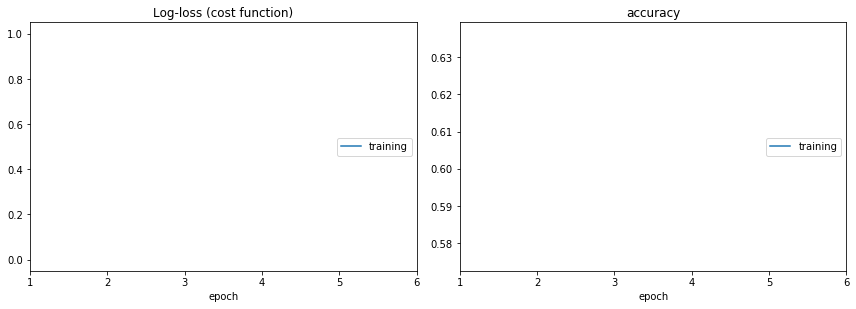

Log-loss (cost function):
training   (min:      nan, max:      nan, cur:      nan)

accuracy:
training   (min:    0.606, max:    0.606, cur:    0.606)
 100/3200 [..............................] - ETA: 50:42 - loss: nan - accuracy: 0.6059

In [16]:
# we must find osme callbacks 
checkpoint = ModelCheckpoint('model_weight.h5',monitor = 'val_loss',
                            save_weights_only = True, mode='min',verbose =0)
callbacks = [PlotLossesCallback(),checkpoint]
batch_size = 32
history = model.fit(
datagen_train.flow(x_train,y_train,batch_size = batch_size,shuffle=True),
                   steps_per_epoch = len(x_train),#batch size
                   validation_data = datagen_val.flow(x_val,y_val,batch_size=batch_size,shuffle=True),
                   validation_steps = len(x_val),#batch size
                   epochs = 6, # recommended epochs 12 
                   callbacks = callbacks
                                    
                  )# pass generators 

## Task 8: Model Evaluation

In [17]:
model.evaluate(x_val,y_val)

800/800 [==============================] - 3s 4ms/sample - loss: nan - accuracy: 0.2500


[nan, 0.25]

In [18]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import seaborn as sns

y_true = np.argmax(y_val , 1)
y_pred = np.argmax(model.predict(x_val),1)
print(metrics.classification_report(y_true,y_pred))

              precision    recall  f1-score   support

           0       0.25      1.00      0.40       200
           1       0.00      0.00      0.00       200
           2       0.00      0.00      0.00       200
           3       0.00      0.00      0.00       200

    accuracy                           0.25       800
   macro avg       0.06      0.25      0.10       800
weighted avg       0.06      0.25      0.10       800



In [19]:
# take a look at classification accuracy 
print("Classification accuracy : %0.06f" % metrics.accuracy_score(y_true , y_pred))

Classification accuracy : 0.250000


In [20]:
labels = ["squiggle", "narrowband", "noise", "narrowbanddrd"]
